In [9]:
10980*10980*4/1024/1024/1024*6

2.6947349309921265

# Model Visualization

In [4]:
%load_ext autoreload
%autoreload 2

import importlib    

# check if it is using CPU or GPU
# First the CPU version
if importlib.util.find_spec('torch') is None:
    %pip install --quiet torch torchvision --extra-index-url https://download.pytorch.org/whl/cpu
    
if importlib.util.find_spec('fastai') is None:
    # Then install fastai from code
    !cd /tmp; git clone https://github.com/fastai/fastai -q
    %pip -q install -e /tmp/fastai 
    
# Install WaterNet
if importlib.util.find_spec('waternet') is None:
    %pip install -e /home/jovyan/projects/WaterNet/
    
from waternet.wndataset import WNDataSet
from fastai.vision.all import *



### Creating the Datasets

In [5]:
masks_path = '/home/jovyan/tmp3'
training_bands = ['B04', 'B03', 'B02', 'B08', 'B11', 'B12']
# masks_path='d:/temp/22KEV/'

In [6]:
# default config for shape, size and step
config = dict(
    shape=(5490, 5490),
    patch_size=(512, 512),
    step=262,    
)

In [7]:
# a single image for the validation
valid_ds = WNDataSet.from_masks(
    masks_path=masks_path,
    pattern='*S2B_MSIL2A_2021*watermask.tif',
    **config
)

Matching imgs/masks:   0%|          | 0/25 [00:00<?, ?it/s]

In [8]:
valid_ds.bands = training_bands
print(valid_ds)

WNDataset instance with 25 images
Loaded: 0 items
Empty: 25 items
Loading: 0 items



### Creating the Learner

### Testing the "untrained" model from pretrained learner

We will run the validation two times to check for differences between runs

In [9]:
learner = unet_learner(DataLoaders(DataLoader(valid_ds, bs=8)),  arch=resnet18, pretrained=False, normalize=False, n_in=6, n_out=3, loss_func=CrossEntropyLossFlat(axis=1))

Loading image 1 in background


/srv/conda/envs/notebook/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded sucessfully


In [8]:
learner.load('Resnet18-6chnls-untrained3')

model = learner.cuda()
learner.dls = learner.dls.cuda()

learner.validate(ds_idx=0)

Loading image 1 in background


/srv/conda/envs/notebook/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded sucessfully


Cleared image 0
Loading image 2 in background
Loaded sucessfully
Cleared image 1
Loading image 3 in background
Loaded sucessfully
Cleared image 2
Loading image 4 in background
Loaded sucessfully
Cleared image 3
Loading image 5 in background
Loaded sucessfully
Cleared image 4
Loading image 6 in background
Loaded sucessfully
Cleared image 5
Loading image 7 in background
Loaded sucessfully
Cleared image 6
Loading image 8 in background
Loaded sucessfully
Cleared image 7
Loading image 9 in background
Loaded sucessfully
Cleared image 8
Loading image 10 in background
Loaded sucessfully
Cleared image 9
Loading image 11 in background
Loaded sucessfully
Cleared image 10
Loading image 12 in background
Loaded sucessfully
Cleared image 11
Loading image 13 in background
Loaded sucessfully
Cleared image 12
Loading image 14 in background
Loaded sucessfully
Cleared image 13
Loading image 15 in background
Loaded sucessfully
Cleared image 14
Loading image 16 in background
Loaded sucessfully
Cleared image

(#1) [0.16158856451511383]

In [7]:
learner = unet_learner(DataLoaders(DataLoader(valid_ds, bs=8)),  arch=resnet18, pretrained=True, normalize=False, n_in=6, n_out=3, loss_func=CrossEntropyLossFlat(axis=1))

model = learner.cuda()
learner.dls = learner.dls.cuda()

learner.validate(ds_idx=0)

Cleared image 24
Loading image 1 in background


Loaded sucessfully
Cleared image 0
Loading image 2 in background
Loaded sucessfully
Cleared image 1
Loading image 3 in background
Loaded sucessfully
Cleared image 2
Loading image 4 in background
Loaded sucessfully
Cleared image 3
Loading image 5 in background
Loaded sucessfully
Cleared image 4
Loading image 6 in background
Loaded sucessfully
Cleared image 5
Loading image 7 in background
Loaded sucessfully
Cleared image 6
Loading image 8 in background
Loaded sucessfully
Cleared image 7
Loading image 9 in background
Loaded sucessfully
Cleared image 8
Loading image 10 in background
Loaded sucessfully
Cleared image 9
Loading image 11 in background
Loaded sucessfully
Cleared image 10
Loading image 12 in background
Loaded sucessfully
Cleared image 11
Loading image 13 in background
Loaded sucessfully
Cleared image 12
Loading image 14 in background
Loaded sucessfully
Cleared image 13
Loading image 15 in background
Loaded sucessfully
Cleared image 14
Loading image 16 in background
Loaded sucess

(#1) [1.5655814409255981]

### Testing the "untrained" model

In this next test, we will also run it two times. If it is random, the results must change...

In [8]:
learner = unet_learner(DataLoaders(DataLoader(valid_ds, bs=8)),  arch=resnet18, pretrained=False, normalize=False, n_in=6, n_out=3, loss_func=CrossEntropyLossFlat(axis=1))

model = learner.cuda()
learner.dls = learner.dls.cuda()

learner.validate(ds_idx=0)

Cleared image 24
Loading image 1 in background


/srv/conda/envs/notebook/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded sucessfully
Cleared image 0
Loading image 2 in background
Loaded sucessfully
Cleared image 1
Loading image 3 in background
Loaded sucessfully
Cleared image 2
Loading image 4 in background
Loaded sucessfully
Cleared image 3
Loading image 5 in background
Loaded sucessfully
Cleared image 4
Loading image 6 in background
Loaded sucessfully
Cleared image 5
Loading image 7 in background
Loaded sucessfully
Cleared image 6
Loading image 8 in background
Loaded sucessfully
Cleared image 7
Loading image 9 in background
Loaded sucessfully
Cleared image 8
Loading image 10 in background
Loaded sucessfully
Cleared image 9
Loading image 11 in background
Loaded sucessfully
Cleared image 10
Loading image 12 in background
Loaded sucessfully
Cleared image 11
Loading image 13 in background
Loaded sucessfully
Cleared image 12
Loading image 14 in background
Loaded sucessfully
Cleared image 13
Loading image 15 in background
Loaded sucessfully
Cleared image 14
Loading image 16 in background
Loaded sucess

(#1) [1.1307719945907593]

In [9]:
learner = unet_learner(DataLoaders(DataLoader(valid_ds, bs=8)),  arch=resnet18, pretrained=False, normalize=False, n_in=6, n_out=3, loss_func=CrossEntropyLossFlat(axis=1))

model = learner.cuda()
learner.dls = learner.dls.cuda()

learner.validate(ds_idx=0)

Cleared image 24
Loading image 1 in background


Loaded sucessfully
Cleared image 0
Loading image 2 in background
Loaded sucessfully
Cleared image 1
Loading image 3 in background
Loaded sucessfully
Cleared image 2
Loading image 4 in background
Loaded sucessfully
Cleared image 3
Loading image 5 in background
Loaded sucessfully
Cleared image 4
Loading image 6 in background
Loaded sucessfully
Cleared image 5
Loading image 7 in background
Loaded sucessfully
Cleared image 6
Loading image 8 in background
Loaded sucessfully
Cleared image 7
Loading image 9 in background
Loaded sucessfully
Cleared image 8
Loading image 10 in background
Loaded sucessfully
Cleared image 9
Loading image 11 in background
Loaded sucessfully
Cleared image 10
Loading image 12 in background
Loaded sucessfully
Cleared image 11
Loading image 13 in background
Loaded sucessfully
Cleared image 12
Loading image 14 in background
Loaded sucessfully
Cleared image 13
Loading image 15 in background
Loaded sucessfully
Cleared image 14
Loading image 16 in background
Loaded sucess

(#1) [1.080651044845581]

### Testing the trained model (without transfer learning)

In [15]:
learner = learner.load('Resnet18-6chnls-untrained')

In [16]:
learner.validate(ds_idx=0)

Cleared image 24
Loading image 1 in background
Loaded sucessfully
Cleared image 0
Loading image 2 in background
Loaded sucessfully
Cleared image 1
Loading image 3 in background
Loaded sucessfully
Cleared image 2
Loading image 4 in background
Loaded sucessfully
Cleared image 3
Loading image 5 in background
Loaded sucessfully
Cleared image 4
Loading image 6 in background
Loaded sucessfully
Cleared image 5
Loading image 7 in background
Loaded sucessfully
Cleared image 6
Loading image 8 in background
Loaded sucessfully
Cleared image 7
Loading image 9 in background
Loaded sucessfully
Cleared image 8
Loading image 10 in background
Loaded sucessfully
Cleared image 9
Loading image 11 in background
Loaded sucessfully
Cleared image 10
Loading image 12 in background
Loaded sucessfully
Cleared image 11
Loading image 13 in background
Loaded sucessfully
Cleared image 12
Loading image 14 in background
Loaded sucessfully
Cleared image 13
Loading image 15 in background
Loaded sucessfully
Cleared image 

(#1) [0.15474379062652588]

In [17]:
learner = learner.load('Resnet18-6chnls-trained')

learner.validate(ds_idx=0)

Cleared image 24
Loading image 1 in background
Loaded sucessfully
Cleared image 0
Loading image 2 in background
Loaded sucessfully
Cleared image 1
Loading image 3 in background
Loaded sucessfully
Cleared image 2
Loading image 4 in background
Loaded sucessfully
Cleared image 3
Loading image 5 in background
Loaded sucessfully
Cleared image 4
Loading image 6 in background
Loaded sucessfully
Cleared image 5
Loading image 7 in background
Loaded sucessfully
Cleared image 6
Loading image 8 in background
Loaded sucessfully
Cleared image 7
Loading image 9 in background
Loaded sucessfully
Cleared image 8
Loading image 10 in background
Loaded sucessfully
Cleared image 9
Loading image 11 in background
Loaded sucessfully
Cleared image 10
Loading image 12 in background
Loaded sucessfully
Cleared image 11
Loading image 13 in background
Loaded sucessfully
Cleared image 12
Loading image 14 in background
Loaded sucessfully
Cleared image 13
Loading image 15 in background
Loaded sucessfully
Cleared image 

(#1) [2.3833436965942383]

In [9]:
learner = learner.load('Resnet18-6chnls-re-trained')

learner.validate(ds_idx=0)

Cleared image 24
Loading image 1 in background
Loaded sucessfully
Cleared image 0
Loading image 2 in background
Loaded sucessfully
Cleared image 1
Loading image 3 in background
Loaded sucessfully
Cleared image 2
Loading image 4 in background
Loaded sucessfully
Cleared image 3
Loading image 5 in background
Loaded sucessfully
Cleared image 4
Loading image 6 in background
Loaded sucessfully
Cleared image 5
Loading image 7 in background
Loaded sucessfully
Cleared image 6
Loading image 8 in background
Loaded sucessfully
Cleared image 7
Loading image 9 in background
Loaded sucessfully
Cleared image 8
Loading image 10 in background
Loaded sucessfully
Cleared image 9
Loading image 11 in background
Loaded sucessfully
Cleared image 10
Loading image 12 in background
Loaded sucessfully
Cleared image 11
Loading image 13 in background
Loaded sucessfully
Cleared image 12
Loading image 14 in background
Loaded sucessfully
Cleared image 13
Loading image 15 in background
Loaded sucessfully
Cleared image 

(#1) [0.11449109017848969]

### Checking model and predictions

In [11]:
learner.summary()

Loaded sucessfully


DynamicUnet (Input shape: 8 x 6 x 512 x 512)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 64 x 256 x 256  
Conv2d                                    18816      True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     8 x 64 x 128 x 128  
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [12]:
batch, target = learner.dls.train.one_batch()
print(batch.shape, target.shape)

torch.Size([8, 6, 512, 512]) torch.Size([8, 512, 512])


In [ ]:
pred = learner.model(batch)
CrossEntropyLossFlat(axis=1)(pred, target)

## Loading the trained model

In [10]:
learner = learner.load('Resnet18-6chnls-trained-3')

In [13]:
# test the same batch
pred = learner.model(batch)
CrossEntropyLossFlat(axis=1)(pred, target)

TensorBase(0.4435, grad_fn=<AliasBackward0>)

## Visualizing the results

In [14]:
from waternet.wnvisualizer import WNVisualizer

In [15]:
visu = WNVisualizer(learner.dls.train, learner)

In [16]:
visu.predict_item(0)['item'].shape

(6, 512, 512)

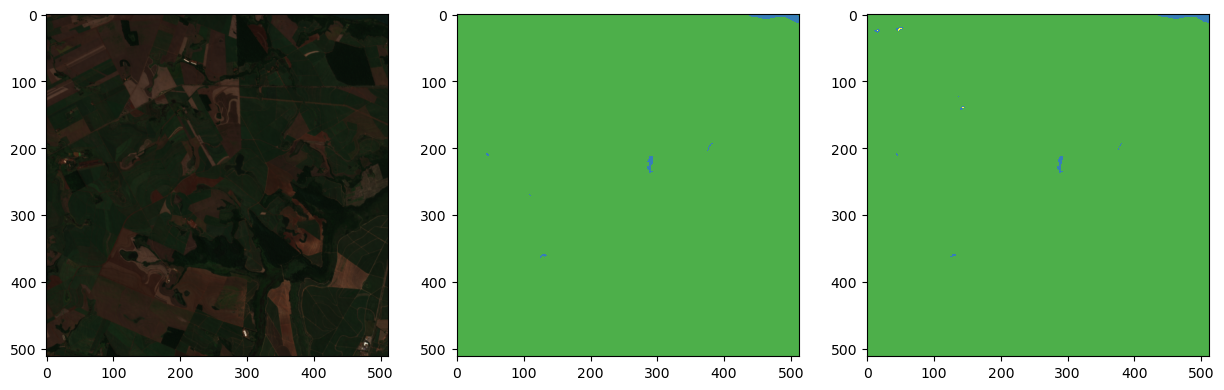

In [59]:
visu.show_pred(579)